# INSTALL JULIA - COLAB

PEGUE O SCRIPT DE TEMPLATE [AQUI](https://colab.research.google.com/drive/1lLHnAUl1kqPB6Fc1tF9r19om24DbYYFh)!

In [22]:
# %%shell
# set -e

# #---------------------------------------------------#
# JULIA_VERSION="1.10.4" # any version ≥ 0.7.0
# JULIA_PACKAGES="IJulia BenchmarkTools Plots"
# JULIA_NUM_THREADS=2
# #---------------------------------------------------#

# if [ -z `which julia` ]; then
# # Install Julia
# JULIA_VER=`cut -d '.' -f -2 <<< "$JULIA_VERSION"`
# echo "Installing Julia $JULIA_VERSION on the current Colab Runtime..."
# BASE_URL="https://julialang-s3.julialang.org/bin/linux/x64"
# URL="$BASE_URL/$JULIA_VER/julia-$JULIA_VERSION-linux-x86_64.tar.gz"
# wget -nv $URL -O /tmp/julia.tar.gz # -nv means "not verbose"
# tar -x -f /tmp/julia.tar.gz -C /usr/local --strip-components 1
# rm /tmp/julia.tar.gz

# # Install Packages
# for PKG in `echo $JULIA_PACKAGES`; do
#     echo "Installing Julia package $PKG..."
#     julia -e 'using Pkg; pkg"add '$PKG'; precompile;"' &> /dev/null
# done

# # Install kernel and rename it to "julia"
# echo "Installing IJulia kernel..."
# julia -e 'using IJulia; IJulia.installkernel("julia", env=Dict(
#     "JULIA_NUM_THREADS"=>"'"$JULIA_NUM_THREADS"'"))'
# KERNEL_DIR=`julia -e "using IJulia; print(IJulia.kerneldir())"`
# KERNEL_NAME=`ls -d "$KERNEL_DIR"/julia*`
# mv -f $KERNEL_NAME "$KERNEL_DIR"/julia

# echo ''
# echo "Successfully installed `julia -v`!"
# echo "Please reload this page (press Ctrl+R or F5) then"
# echo "jump to the 'Checking the Installation' section."
# fi

In [23]:
versioninfo()

Julia Version 1.10.4
Commit 48d4fd4843 (2024-06-04 10:41 UTC)
Build Info:
  Official https://julialang.org/ release
Platform Info:
  OS: Windows (x86_64-w64-mingw32)
  CPU: 6 × Intel(R) Core(TM) i5-9400F CPU @ 2.90GHz
  WORD_SIZE: 64
  LIBM: libopenlibm
  LLVM: libLLVM-15.0.7 (ORCJIT, skylake)
Threads: 1 default, 0 interactive, 1 GC (on 6 virtual cores)


# PROJETO 1 - ANALISE DE ALGORITMO

## LIBS & CONST

In [24]:
using Plots
using BenchmarkTools
using Statistics
using Random

In [25]:
#CONSTs
benchmark_count = 10
img_output = "dummy"

"dummy"

In [26]:
# Constants
n_values = [10^i for i in 4:7]  # Vectors Sizes
q_values = [10^i for i in 2:5]  # Amount of Keys

4-element Vector{Int64}:
    100
   1000
  10000
 100000

In [27]:
# Initialize the list of vectors and keys
key_list = [collect(1:q) for q in q_values]  # K2[1-100], ..., K5[1-10^5]
vector_list = [rand(1:10^5, n) for n in n_values]

4-element Vector{Vector{Int64}}:
 [27072, 83010, 15123, 72090, 22507, 61798, 15748, 23821, 40607, 46545  …  67334, 1061, 22849, 63484, 15303, 22963, 3396, 95710, 18987, 86613]
 [75506, 18231, 76754, 13548, 94040, 79731, 98887, 6282, 11985, 74245  …  18225, 58388, 82247, 87379, 22851, 21383, 92441, 90847, 64215, 15458]
 [45133, 14430, 36712, 91971, 29753, 33657, 1006, 51230, 78500, 62231  …  17457, 7532, 10093, 71384, 34345, 41255, 60238, 88318, 83200, 71273]
 [98372, 10847, 18800, 5085, 83028, 70275, 78643, 81079, 62702, 53276  …  75464, 94931, 73919, 83573, 57062, 59744, 3303, 32573, 97582, 29658]

In [28]:
# Initialize the list of timers
time_simple = zeros(length(n_values), length(q_values))
time_optimized = zeros(length(n_values), length(q_values))
time_binary = zeros(length(n_values), length(q_values))
time_merge = zeros(length(n_values))
time_quick = zeros(length(n_values))

4-element Vector{Float64}:
 0.0
 0.0
 0.0
 0.0

## SEARCH FUNCTIONS

In [29]:
# Simple linear search function
function linear_simple_search(vector, key)
    for i in 1:length(vector)
        if key == vector[i]
            return i  # Returns the index where the key was found
        end
    end
    return -1  # Returns -1 if the key is not found
end

linear_simple_search (generic function with 1 method)

In [30]:
# Optimized linear search function
function linear_optimized_search(vector, key)
    for i in 1:length(vector)
        if key == vector[i]
            return i  # Returns the index where the key was found
        elseif key < vector[i]
            return -1  # Returns -1 if the key is not found
        end
    end
    return -1  # Returns -1 if the key is not found
end

linear_optimized_search (generic function with 1 method)

In [31]:
# Binary search function
function binary_search(vector, key)
    low, high = 1, length(vector)
    while low <= high
        mid = div(low + high, 2)
        if vector[mid] == key
            return mid  # Returns the index where the key was found
        elseif vector[mid] < key
            low = mid + 1
        else
            high = mid - 1
        end
    end
    return -1  # Returns -1 if the key is not found
end

binary_search (generic function with 1 method)

## DUMMYS

In [32]:
# Dummy sort function
function dummy_sort(time_matrix, sort_function)
    for i in 1:length(vector_list)   # For each vector size
        start = time_ns()
        [sort(deepcopy(vector_list[i]), alg=sort_function) for _ in 1:benchmark_count]
        time_matrix[i] = (time_ns() - start) / 1e9
    end
end

dummy_sort (generic function with 1 method)

In [33]:
# Dummy search function
function dummy_search(search_func, vector, keys)
    [search_func(vector, k) for k in keys]
end

dummy_search (generic function with 1 method)

## BENCHMARKING

In [34]:
# Benchmark macro
function my_benchmark(search_func, time_matrix)
    for i in 1:length(vector_list)   # For each vector size
        for j in 1:length(key_list)  # For each key numbers
            start = time_ns()
            for c in 1:benchmark_count
                dummy_search(search_func, [vector_list[i]], [key_list[j]])
            end
            time_matrix[i, j] = (time_ns() - start) / 1e9
        end
    end
end

my_benchmark (generic function with 1 method)

In [35]:
my_benchmark(linear_simple_search, time_simple)

In [36]:
dummy_sort(time_merge, MergeSort)
dummy_sort(time_quick, QuickSort)
sort!(vector_list)

4-element Vector{Vector{Int64}}:
 [27072, 83010, 15123, 72090, 22507, 61798, 15748, 23821, 40607, 46545  …  67334, 1061, 22849, 63484, 15303, 22963, 3396, 95710, 18987, 86613]
 [45133, 14430, 36712, 91971, 29753, 33657, 1006, 51230, 78500, 62231  …  17457, 7532, 10093, 71384, 34345, 41255, 60238, 88318, 83200, 71273]
 [75506, 18231, 76754, 13548, 94040, 79731, 98887, 6282, 11985, 74245  …  18225, 58388, 82247, 87379, 22851, 21383, 92441, 90847, 64215, 15458]
 [98372, 10847, 18800, 5085, 83028, 70275, 78643, 81079, 62702, 53276  …  75464, 94931, 73919, 83573, 57062, 59744, 3303, 32573, 97582, 29658]

In [37]:
my_benchmark(linear_optimized_search, time_optimized)

In [38]:
my_benchmark(binary_search, time_binary)

## PLOTS

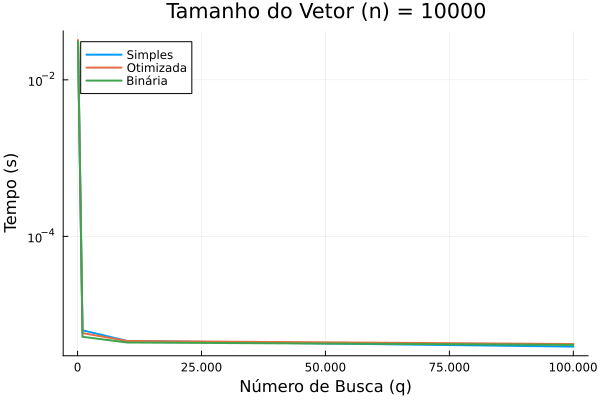

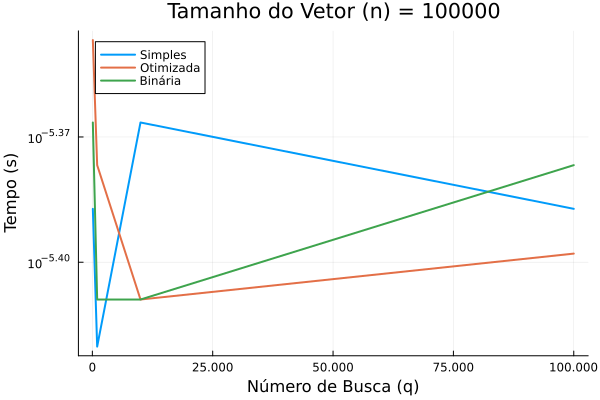

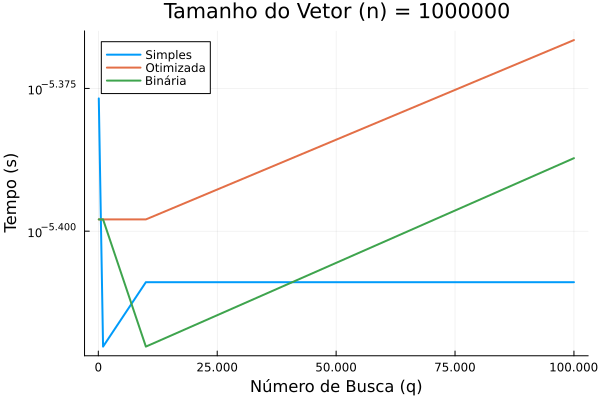

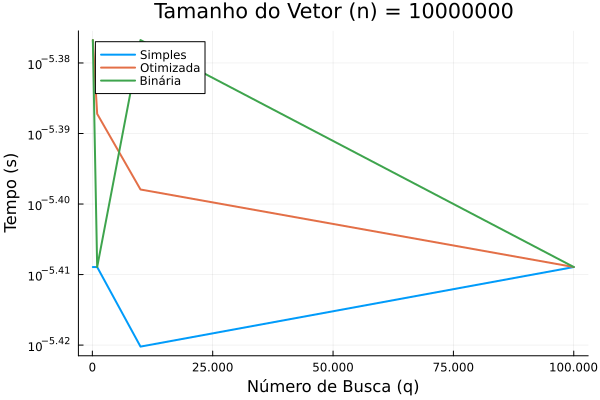

In [39]:
# Plotting the results
xtick_positions = [0, 25000, 50000, 75000, 10^5]
xtick_labels = ["0", "25.000", "50.000", "75.000", "100.000"]

for i in 1:length(n_values)
    p = plot(
        q_values,
        time_simple[i, :],
        label = "Simples",
        xlabel = "Número de Busca (q)",
        ylabel = "Tempo (s)",
        title = "Tamanho do Vetor (n) = $(n_values[i])",
        legend = :topleft,
        xticks = (xtick_positions, xtick_labels),
        yscale = :log10,  # log scale
        lw = 2
    )
    plot!(q_values, time_optimized[i, :], label = "Otimizada", lw = 2)
    plot!(q_values, time_binary[i, :], label = "Binária", lw = 2)
    # plot!(q_values, time_sort[i] .* ones(length(q_values)), label = "Ordenação", lw = 2)

    display(p)
    savefig(p, "../imgs/n_size/log/$(img_output)_10^$(i+3).png")
end

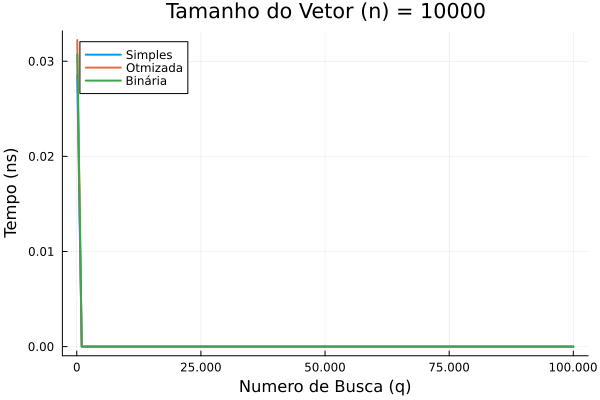

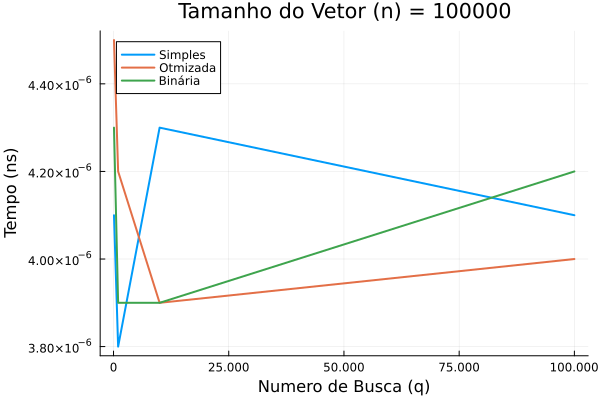

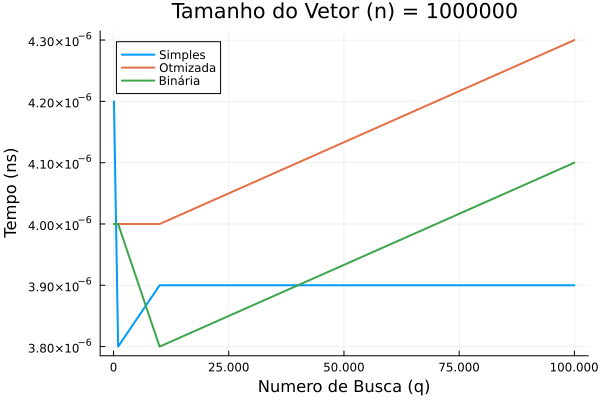

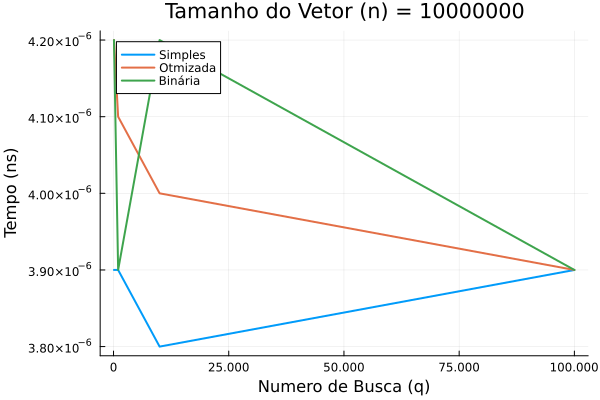

In [40]:
xtick_positions = [0, 25000, 50000, 75000, 10^5]
xtick_labels = ["0", "25.000", "50.000", "75.000", "100.000"]

# Ploting graphics
for i in 1:4
    p = plot(
        q_values,
        time_simple[i, :],
        label = "Simples",
        xlabel = "Numero de Busca (q)",
        ylabel = "Tempo (ns)",
        title = "Tamanho do Vetor (n) = $(n_values[i])",
        legend = :topleft,
        xticks = (xtick_positions, xtick_labels),
        lw = 2
    )
    plot!(q_values, time_optimized[i, :], label = "Otmizada", lw = 2)
    plot!(q_values, time_binary[i, :], label = "Binária", lw = 2)
    # plot!(q_values, time_sort, label = "Ordenarção", lw = 2)

    display(p)
    savefig(p, "../imgs/n_size/linear/$(img_output)_10^$(i+3).png")
end

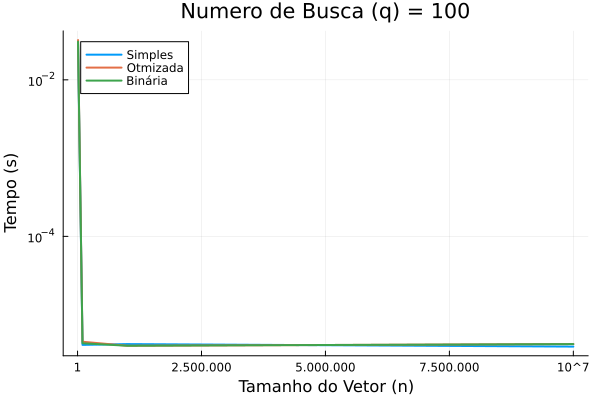

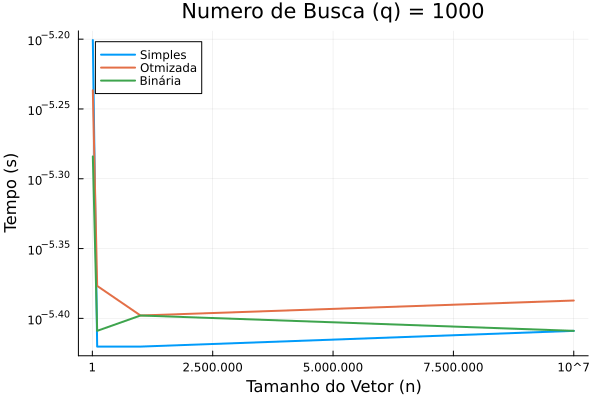

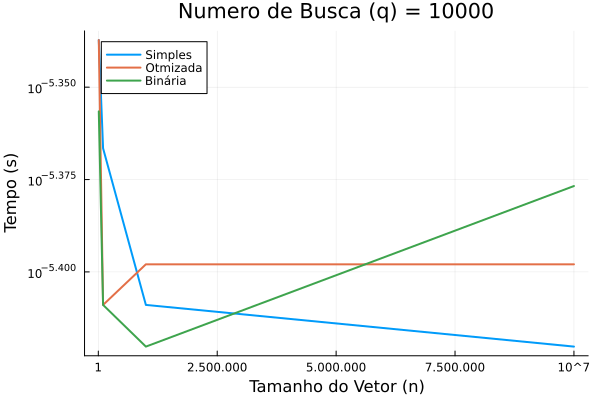

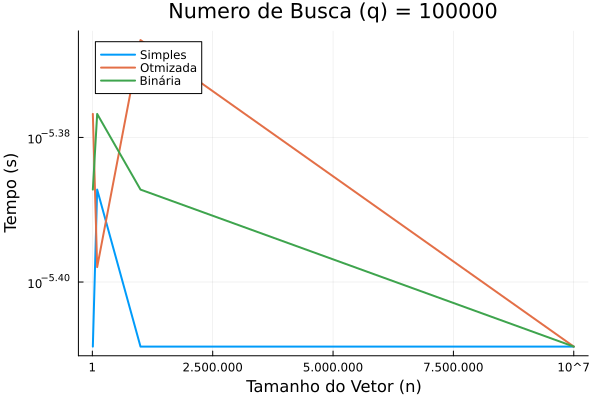

In [41]:
xtick_positions = [1, 2500000, 5000000, 7500000, 10^7]
xtick_labels = ["1", "2.500.000", "5.000.000", "7.500.000", "10^7"]

# Ploting graphics
for i in 1:4
    p = plot(
        n_values,
        time_simple[:, i],
        label = "Simples",
        xlabel = "Tamanho do Vetor (n)",
        ylabel = "Tempo (s)",
        title = "Numero de Busca (q) = $(q_values[i])",
        legend = :topleft,
        yscale = :log10,
        xticks = (xtick_positions, xtick_labels),
        lw = 2
    )
    plot!(n_values, time_optimized[:, i], label = "Otmizada", lw = 2)
    plot!(n_values, time_binary[:, i], label = "Binária", lw = 2)
    # plot!(n_values, time_sort, label = "Ordenarção", lw = 2)

    display(p)
    savefig(p, "../imgs/q_size/log/$(img_output)Tempo_10^$(i+1).png")
end

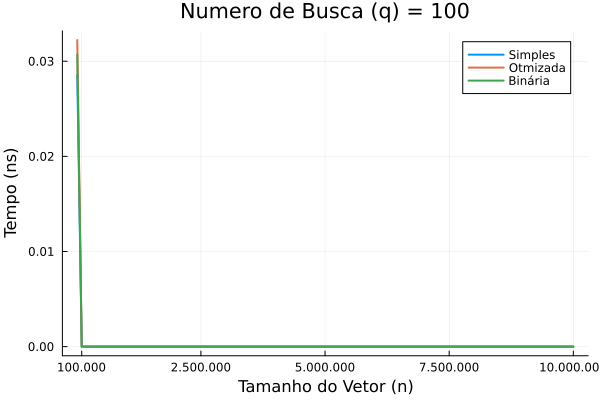

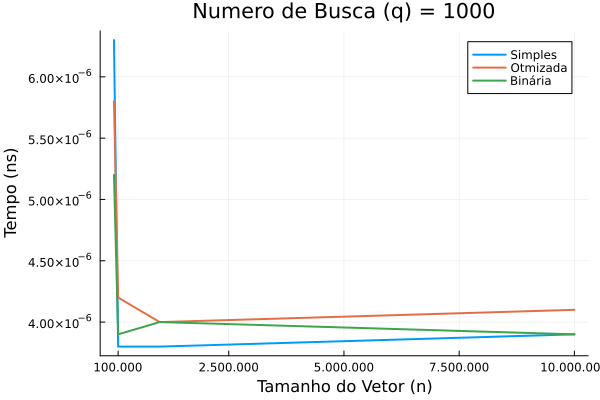

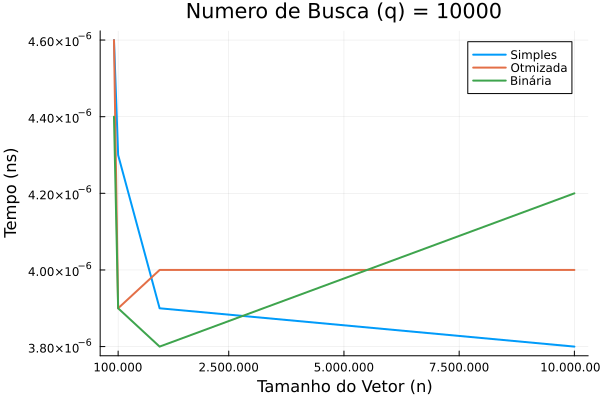

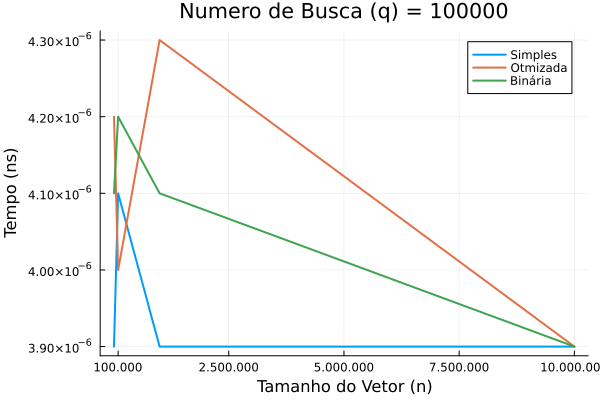

In [42]:
xtick_positions = [10^5, 2500000, 5000000, 7500000, 10^7]
xtick_labels = ["100.000", "2.500.000", "5.000.000", "7.500.000", "10.000.000"]

# Ploting graphics
for i in 1:4
    p = plot(
        n_values,
        time_simple[:, i],
        label = "Simples",
        xlabel = "Tamanho do Vetor (n)",
        ylabel = "Tempo (ns)",
        title = "Numero de Busca (q) = $(q_values[i])",
        legend = :topright,
        xticks = (xtick_positions, xtick_labels),
        lw = 2
    )
    
    plot!(n_values, time_optimized[:, i], label = "Otmizada", lw = 2)
    plot!(n_values, time_binary[:, i], label = "Binária", lw = 2)
    # plot!(n_values, time_sort, label = "Ordenarção", lw = 2)


    display(p)
    savefig(p, "../imgs/q_size/linear/$(img_output)_10^$(i+1).png")
end